In [1]:
import numpy as np
import matplotlib.pyplot as plt

0.01198777247207848


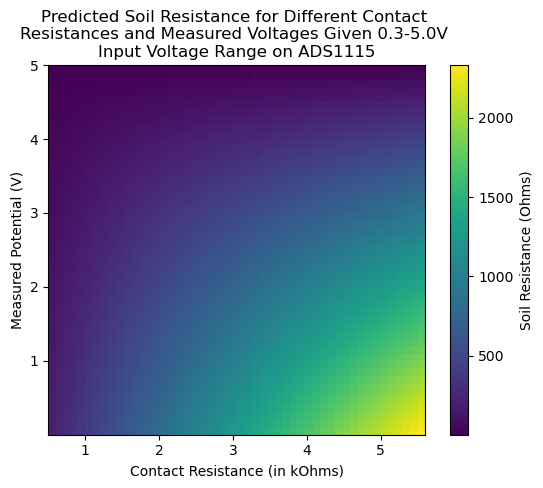

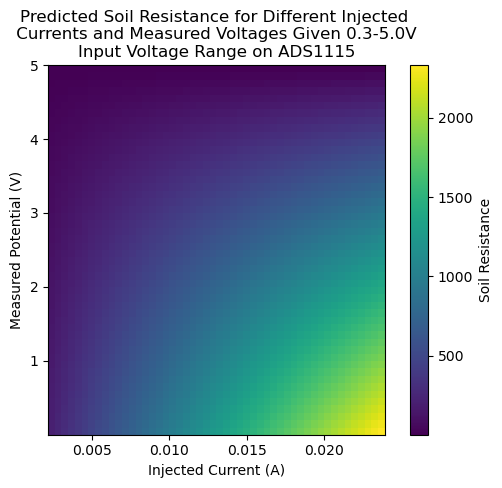

In [21]:
def r(v, i):
    return v/i

def rsoil(ps, rlead, rcontact, vmeas): 
    i = ps/(rlead + rcontact)  # find injected current
    return r(vmeas, i) # return soil resistance from voltmeter


ps = 12
rlead = 1.02
rcontact = np.linspace(500, 5600)
vmeas = np.linspace(0.3e-3, 5.0)
injcurrent = ps/(rlead + rcontact)
print(ps/(rlead + 1000))
rcs, vms = np.meshgrid(rcontact, vmeas)
soil = rsoil(ps, rlead, rcs, vms)

plt.imshow(soil, extent=[min(rcontact)/1000,max(rcontact)/1000,min(vmeas),max(vmeas)])

plt.xlabel("Contact Resistance (in kOhms)")
plt.ylabel("Measured Potential (V)")
plt.colorbar(label="Soil Resistance (Ohms)")
plt.title("Predicted Soil Resistance for Different Contact \nResistances and Measured Voltages Given 0.3-5.0V \nInput Voltage Range on ADS1115") 

plt.show()


# Now showing injected current.

rcs, vms = np.meshgrid(injcurrent, vmeas)

plt.imshow(soil, extent=[min(injcurrent),max(injcurrent),min(vmeas),max(vmeas)], aspect=max(injcurrent)/max(vmeas))

plt.xlabel("Injected Current (A)")
plt.ylabel("Measured Potential (V)")
plt.colorbar(label="Soil Resistance")
plt.title("Predicted Soil Resistance for Different Injected \n Currents and Measured Voltages Given 0.3-5.0V \nInput Voltage Range on ADS1115") 

plt.show()


In [3]:
print(np.max(soil), np.min(soil))

2333.7583333333337 0.012525499999999998


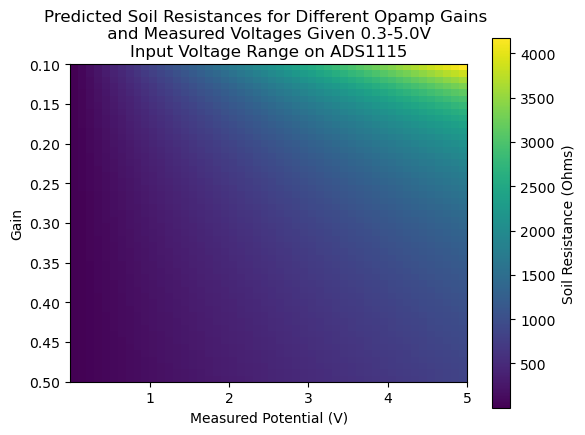

0.0006 50.0
0.1 0.5


In [4]:
"""
So we want resistivity, which is proportional to resistance (times a geometric factor).
So I'm going to assume the geometric factor is 1 and instead set the contact resistance to 1000 Ohms and
look at the soil resistance as a function of fractional gain in the opamps. Then I will also plot the maximum and 
minimum soil resistance as a function of fractional gain. Ideally we want a range of ~0.02-5k ohms or something.
"""

gain = np.linspace(0.1, 0.5)
vmss, gains = np.meshgrid(vmeas, gain)
vactual = vmeas/gains
soil2 = rsoil(ps, rlead, 1000, vactual)

plt.imshow(soil2, extent=[min(vmeas),max(vmeas),max(gain),min(gain)], aspect=max(vmeas)/max(gain))

plt.xlabel("Measured Potential (V)")
plt.ylabel("Gain")
plt.colorbar(label="Soil Resistance (Ohms)")
plt.title("Predicted Soil Resistances for Different Opamp Gains \n and Measured Voltages Given 0.3-5.0V \nInput Voltage Range on ADS1115") 

plt.show()
print(np.min(vactual), np.max(vactual))
print(np.min(gains), np.max(gains))


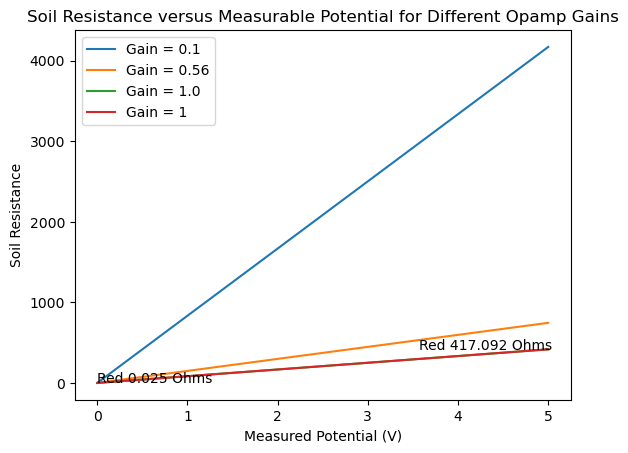

In [22]:
check = rsoil(ps, rlead, 1000, vmeas)

plt.title("Soil Resistance versus Measurable Potential for Different Opamp Gains")
plt.xlabel("Measured Potential (V)")
plt.ylabel("Soil Resistance")
plt.plot(vmss[0], soil2[0], label="Gain = 0.1")
plt.plot(vmss[25], soil2[25], label=f"Gain = {round(gain[25], 2)}")
plt.plot(vmss[len(vmeas)-1], soil2[len(vmeas)-1], label=f"Gain = {round(gain[len(vmeas)-1], 2)}")
plt.plot(vmeas, check, label="Gain = 1")
plt.annotate(f"Red {round(check[0], 3)} Ohms", (vmeas[0], check[0]))
plt.annotate(f"Red {round(check[-1], 3)} Ohms", (vmeas[-15], check[-1]))
plt.legend()

Text(0, 0.5, 'Soil Resistance (Ohms)')

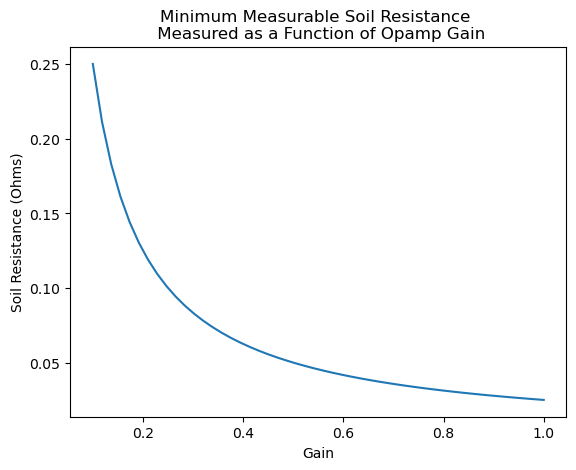

In [18]:
plt.plot(gains[:,0], soil2[:,0])
# plt.plot(gains[:,1], soil2[:,1])
# plt.plot(gains[:,2], soil2[:,2])
# plt.plot(gains[:,3], soil2[:,3])
# plt.plot(gains[:,3], soil2[:,3])

# for i in range(50):
#     plt.plot(gains[:,i], soil2[:,i])

plt.title("Minimum Measurable Soil Resistance \n Measured as a Function of Opamp Gain")
plt.xlabel("Gain")
plt.ylabel("Soil Resistance (Ohms)")

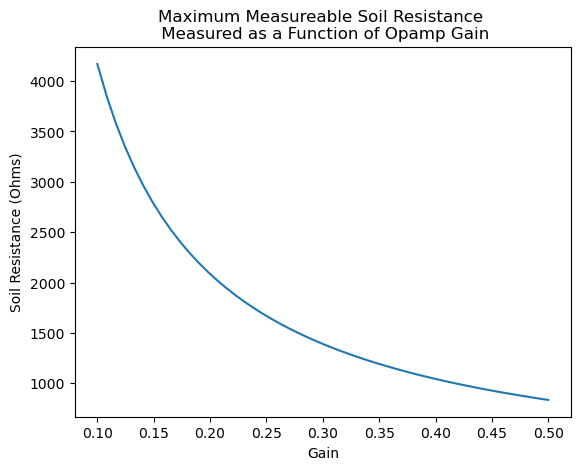

In [7]:
plt.title("Maximum Measureable Soil Resistance \n Measured as a Function of Opamp Gain")
plt.xlabel("Gain")
plt.ylabel("Soil Resistance (Ohms)")
plt.plot(gains[:,len(vmeas)-1], soil2[:,len(vmeas)-1])

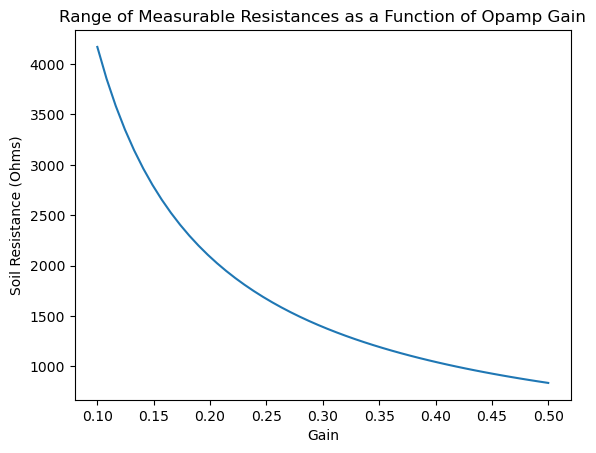

In [8]:
plt.title("Range of Measurable Resistances as a Function of Opamp Gain")
plt.xlabel("Gain")
plt.ylabel("Soil Resistance (Ohms)")
plt.plot(gains[:,len(vmeas)-1], soil2[:,len(vmeas)-1] - soil2[:,0])

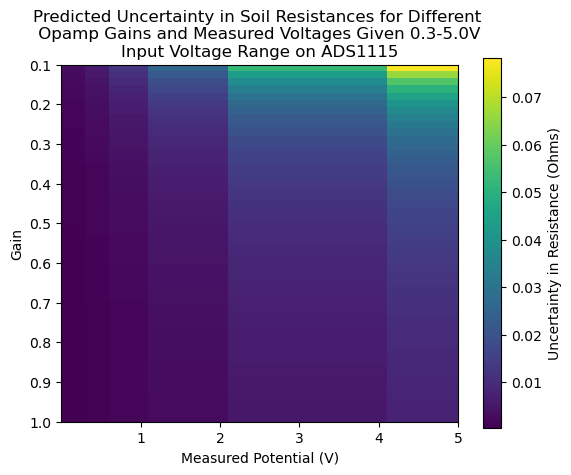

In [14]:
"""
Understandably, the ADC fractional error should go up when we decrease gain because we're covering a 
wider number of resistances. I hope this shouldn't be too much of a problem because ADS1115 is 
pretty precise according to the datasheet (16 bit resolution)
"""

def precision(vmeas):
    if vmeas<0.256:
        return 0.256/2**16
    
    elif (vmeas >= 0.256) & (vmeas < 0.512):
        return 0.512/2**16
    
    elif (vmeas >= 0.512) & (vmeas < 1.024):
        return 1.024/2**16
    
    elif (vmeas >= 1.024) & (vmeas < 2.048):
        return 2.048/2**16
    
    elif (vmeas >= 2.048) & (vmeas < 4.096):
        return 4.096/2**16
    
    elif (vmeas >= 4.096) & (vmeas < 6.144):
        return 6.144/2**16

acc = max(vmeas)/2**16
acc = np.vectorize(precision)(vmeas)

gain = np.linspace(0.1, 1)
vmss, gains = np.meshgrid(vmeas, gain)
vactual = vmeas/gains
soil2 = rsoil(ps, rlead, 1000, vactual)
err = (soil2/vmss)*acc

plt.imshow(err, extent=[min(vmeas),max(vmeas),max(gain),min(gain)], aspect=max(vmeas)/max(gain))

plt.xlabel("Measured Potential (V)")
plt.ylabel("Gain")
plt.colorbar(label="Uncertainty in Resistance (Ohms)")
plt.title("Predicted Uncertainty in Soil Resistances for Different \n Opamp Gains and Measured Voltages Given 0.3-5.0V \nInput Voltage Range on ADS1115") 

plt.show()

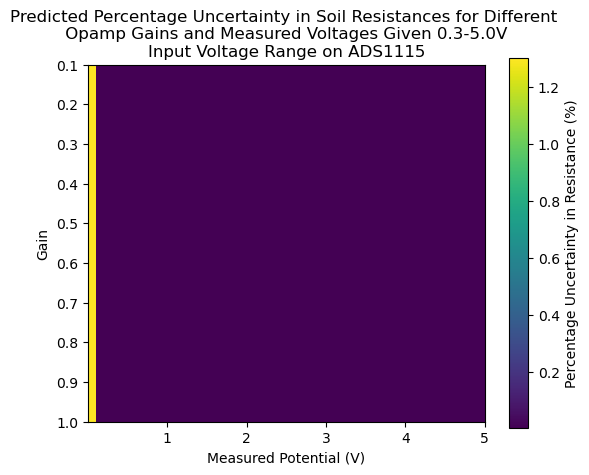

0.0003 50.0
0.0003258528645833334 0.07820468750000001


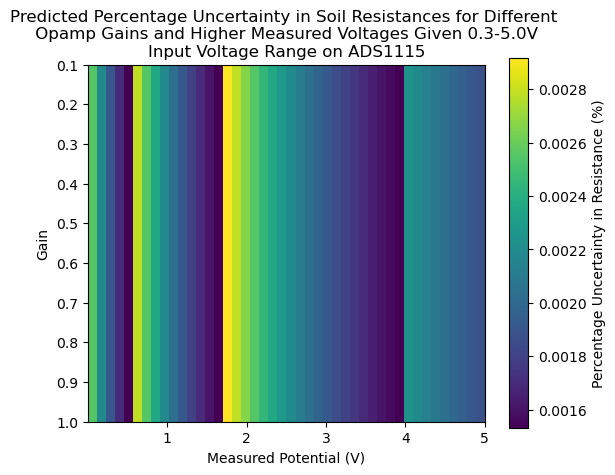

0.0003 50.0
0.0003258528645833334 0.07820468750000001


In [16]:
plt.imshow((err/soil2)*100, extent=[min(vmeas),max(vmeas),max(gain),min(gain)], aspect=max(vmeas)/max(gain))

plt.xlabel("Measured Potential (V)")
plt.ylabel("Gain")
plt.colorbar(label="Percentage Uncertainty in Resistance (%)")
plt.title("Predicted Percentage Uncertainty in Soil Resistances for Different \n Opamp Gains and Measured Voltages Given 0.3-5.0V \nInput Voltage Range on ADS1115") 

plt.show()

print(np.min(vactual), np.max(vactual))
print(np.min(err), np.max(err))

# woah, the error is huge at small voltages! Looking at larger voltages to better see the difference 
plt.imshow((err[:,6:]/soil2[:,6:])*100, extent=[min(vmeas),max(vmeas),max(gain),min(gain)], aspect=max(vmeas)/max(gain))

plt.xlabel("Measured Potential (V)")
plt.ylabel("Gain")
plt.colorbar(label="Percentage Uncertainty in Resistance (%)")
plt.title("Predicted Percentage Uncertainty in Soil Resistances for Different \n Opamp Gains and Higher Measured Voltages Given 0.3-5.0V \nInput Voltage Range on ADS1115") 

plt.show()

print(np.min(vactual), np.max(vactual))
print(np.min(err), np.max(err))

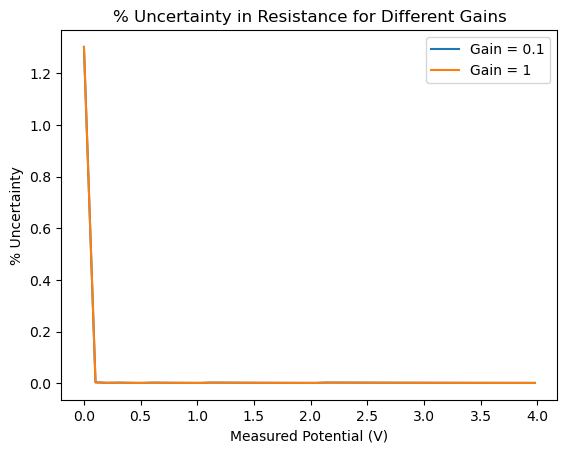

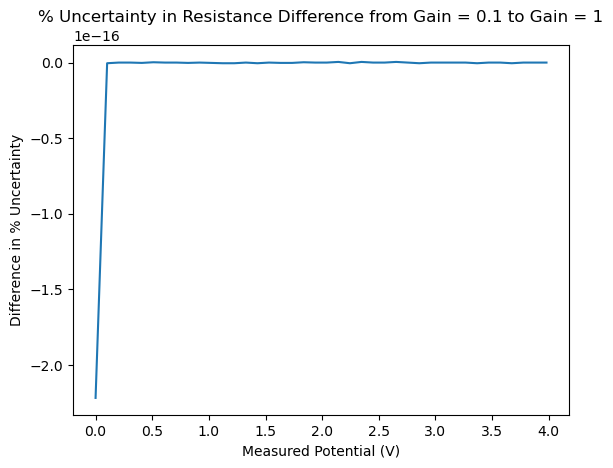

In [17]:
# Looks like its pretty much the same for all gains. Plotting the % uncertainty versus potential for a gain of 0.1 and then 1

plt.title("% Uncertainty in Resistance for Different Gains")
plt.xlabel("Measured Potential (V)")
plt.ylabel("% Uncertainty")
plt.plot(vmeas[:-10], (100*err/soil2)[0,:][:-10], label="Gain = 0.1")
plt.plot(vmeas[:-10], (100*err/soil2)[len(vmeas)-1,:][:-10], label="Gain = 1")
plt.legend()
plt.show()


# Do a difference plot just to show they are different for different gains. 
plt.title("% Uncertainty in Resistance Difference from Gain = 0.1 to Gain = 1")
plt.xlabel("Measured Potential (V)")
plt.ylabel("Difference in % Uncertainty")
plt.plot(vmeas[:-10], (100*err/soil2)[0,:][:-10]-(100*err/soil2)[len(vmeas)-1,:][:-10], label="Gain = 0.1")
plt.show()

# WOW thats small. What's going on??? Could it be that the soil resistance is just too large? 
# But why is the difference on order of 1e-15???


In [ ]:
"""
Looks like the tradeoff is large-- the minimum resistance you can read at 0.1 gain is 0.25 ohms (oof).
But there looks like there is an exponential decrease in resistance range with increasing gain.
Would it be possible to add a switch so that the signal is initially sent through an amplifier with a gain 
of 1 but rails at 5 V and if it saturates the rails then its switched into another opamp that has a fractional 
gain? This would give us a lot more control. Another thing I'm confused about is why the team gave the opamp
such large power supply range when the ADC can only accept 0.3mV - 5V.
"""